<a href="https://colab.research.google.com/github/rezkyadi/Data-Analyst-Training/blob/main/Student_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Project 1 - Salary Analysis**
Tujuan : mengetahui hubungan lama pengalaman kerja dan jumlah gaji yang diterima.
<br>- Dataset : Salary_dataset 
<br>- Methods : 
1. OLS (statsmodel)
2. Bayesian Regression (sklearn)
3. SVM Regression (sklearn)

**Preprocessing**

In [ ]:
#Import Library Packages
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#add dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

#baca file dataset
salary_data = pd.read_csv('/content/drive/MyDrive/Training/datasets/Salary_dataset.csv')

salary_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,No,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [ ]:
#melihat ukuran tabel dataset (jumlah baris dan kolom)
salary_data.shape

(30, 3)

In [ ]:
#melihat informasi tipe data dari setiap kolom yang ada di dataset
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
#mengecek apakah ada data null pada dataset
salary_data.isnull().any().any()

False

In [ ]:
#mengecek apakah ada data duplicate pada dataset
salary_data.duplicated().any().any()

False

In [ ]:
#menghapus kolom 'No' (tidak digunakan dalam perhitungan dan visualisasi)
salary_data = df.drop(['No'], axis=1)
salary_data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
#menghitung statistik (rata-rata, standar deviasi,min, dll)
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


**Visualization**

<Axes: >

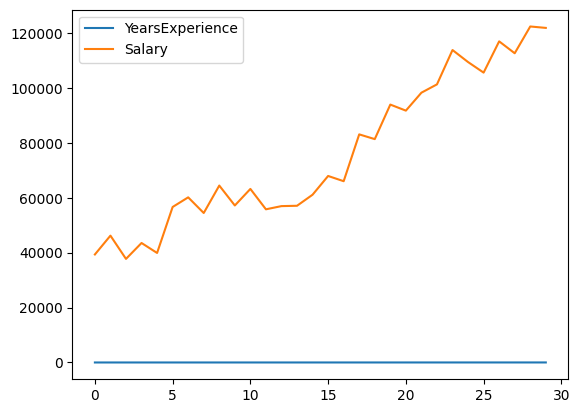

In [ ]:
#Visualisasi dengan Line graph
salary_data.plot()

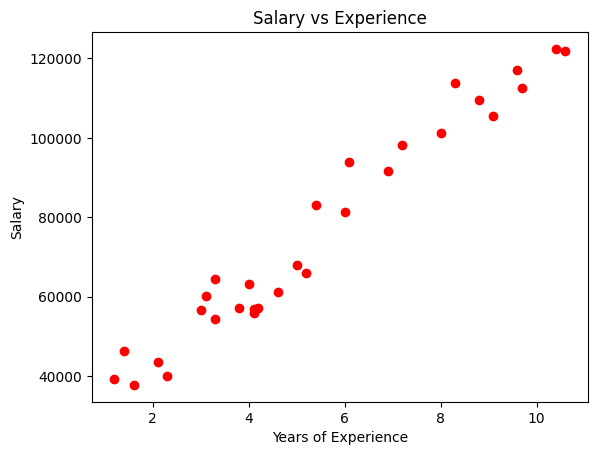

In [ ]:
#visualisasi dengan plot scatter
plt.scatter(salary_data['YearsExperience'], salary_data['Salary'], color = 'red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**OLS (Statsmodel)**

In [ ]:
## Define x dan y
x = salary_data[['YearsExperience']]
y = salary_data['Salary']

In [ ]:
salary_data.corr()

,No,YearsExperience,Salary
No,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


In [ ]:
#membuat model OLS
modelOLS = smf.ols(formula='Salary~YearsExperience',data=salary_data).fit()

In [ ]:
modelOLS.params

Intercept          24848.203967
YearsExperience     9449.962321
dtype: float64

In [ ]:
modelOLS.pvalues

Intercept          1.816526e-11
YearsExperience    1.143068e-20
dtype: float64

In [ ]:
modelOLS.rsquared

0.9569566641435086

In [ ]:
#regression
modelOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        12:40:57   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Prediksi salary based on years experiences
prediksi_sal = modelOLS.predict(pd.DataFrame(df['YearsExperience']))
prediksi_sal

0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484
13     64538.045717
14     68318.030645
15     72098.015574
16     73988.008038
17     75878.000502
18     81547.977895
19     82492.974127
20     90052.943985
21     92887.932681
22    100447.902538
23    103282.891235
24    108007.872395
25    110842.861092
26    115567.842252
27    116512.838485
28    123127.812110
29    125017.804574
dtype: float64

In [ ]:
#RMSE

from statsmodels.tools.eval_measures import rmse

#menghitung RMSE prediksi salary

rmse_val = rmse(salary_data['Salary'], prediksi_sal)
rmse_val

5592.043608760659

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience OLS')

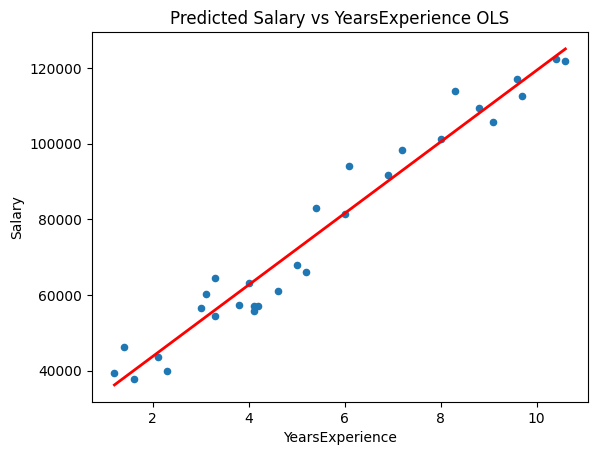

In [ ]:
#Visualisasi dengan Scatter Plot dari predicted salary terhadap years experience

salary_data.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(salary_data['YearsExperience']),prediksi_sal,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience OLS')

**Bayesian Regression (sklearn)**

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
regr_bayes = linear_model.BayesianRidge()
regr_bayes.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'tol': 0.001,
 'verbose': False}

Prediksi salary dengan Bayesian: 5592.19


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - Bayesian Regression')

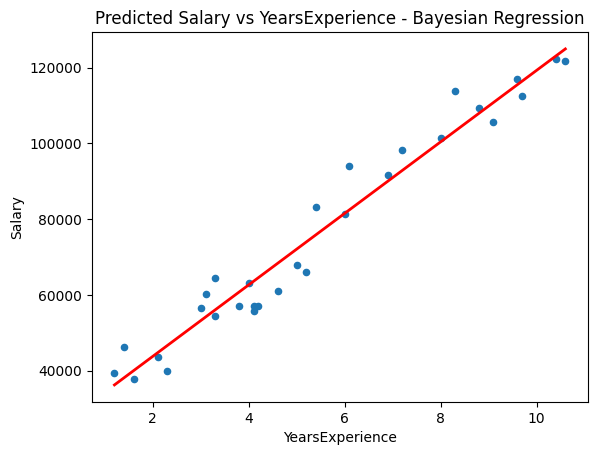

In [ ]:
years = salary_data['YearsExperience'].values.reshape(-1,1)
salary = salary_data['Salary'].values.reshape(-1,1)

# Train model
regr_bayes.fit(years, salary.ravel())

# Prediksi salary dengan bayesian regression
prediksi_sal2 = regr_bayes.predict(years)

# RMSE
print('Prediksi salary dengan Bayesian: %.2f'
      % mean_squared_error(salary, prediksi_sal2, squared = False))

# Visualisasi dengan Scatter Plot dari predicted salary terhadap years experience
salary_data.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(salary_data['YearsExperience']),prediksi_sal2,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - Bayesian Regression')

**SVM Regression (sklearn)**

In [ ]:
# Membuat objek SVM regression
from sklearn import svm
regr_svm1 = svm.LinearSVR()
regr_svm1.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

Hasil Prediksi dengan SVM: 79636.99


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Predicted Salary vs YearsExperience - with SVM Regression')

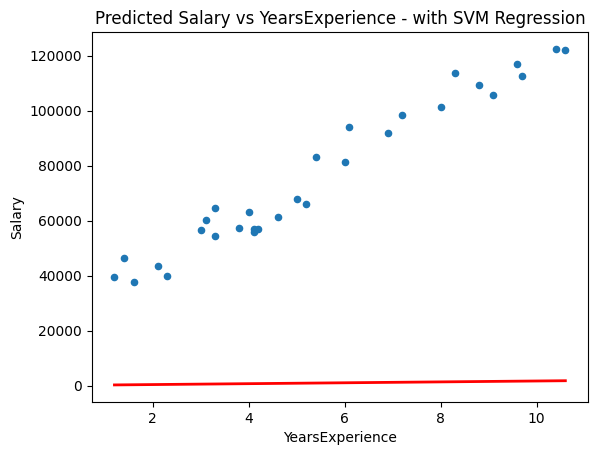

In [ ]:
# Train model
regr_svm1.fit(years, salary.ravel())

# prediksi salary dengan SVM regression
prediksi_sal3 = regr_svm1.predict(years)

# RMSE
print('Hasil Prediksi dengan SVM: %.2f'
      % mean_squared_error(salary, prediksi_sal3, squared = False))

# Visualisasi dengan Scatter Plot dari predicted salary terhadap years experience
salary_data.plot(kind='scatter', x='YearsExperience', y='Salary')
plt.plot(pd.DataFrame(salary_data['YearsExperience']),prediksi_sal3,c='red',linewidth=2)
plt.title('Predicted Salary vs YearsExperience - with SVM Regression')